# Глава 5. Обобщение градиентного спуска

In [20]:
def w_sum(a, b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]
    return output

weights = [0.1, 0.2, -.1]

def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred

toes = [8.5, 9.5, 9.9, 9.0]  # Среднее количество сыгранных матчей
wlrec = [0.65, 0.8, 0.8, 0.9]  # Доля побед
nfans = [1.2, 1.3, 0.5, 1.0]  # Количество фанатов в миллионах

win_or_lose = [1, 1, 0, 1]  # Целевое предсказание

def ele_mul(number, vector):
    output = [0] * len(vector)
    for i in range(len(vector)):
        output[i] = number * vector[i]
    return output


input = [toes[0], wlrec[0], nfans[0]]
true = win_or_lose[0]

pred = neural_network(input, weights)
error = (pred - true) ** 2
delta = pred - true

weight_deltas = ele_mul(delta, input)

alpha = 0.01

for i in range(len(weights)):
    weights[i] -= alpha * weight_deltas[i]

print(f"Weights: {weights}\tWeight deltas: {weight_deltas}")

Weights: [0.1119, 0.20091, -0.09832]	Weight deltas: [-1.189999999999999, -0.09099999999999994, -0.16799999999999987]


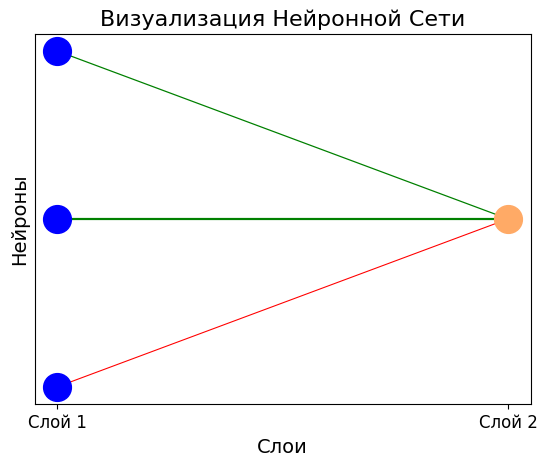

In [21]:
import numpy as np
import visualizer

visualizer.visualize([3, 1], [np.array([weights]).T])

## Замораживание одного веса

In [22]:
def neural_network(input, weights):
    output = 0
    for i in range(len(input)):
        output += input[i] * weights[i]
    return output

def ele_mul(scalar, vector):
    output = [0] * len(vector)
    for i in range(len(vector)):
        output[i] = scalar * vector[i]
    return output

toes = [8.5, 9.5, 9.9, 9.0]  # Среднее количество сыгранных матчей
wlrec = [0.65, 0.8, 0.8, 0.9]  # Доля побед
nfans = [1.2, 1.3, 0.5, 1.0]  # Количество фанатов в миллионах

win_or_lose = [1, 1, 0, 1]  # Целевое предсказание
true = win_or_lose[0]

alpha = 0.3
weights = [0.1, 0.2, -0.1]
input = [toes[0], wlrec[0], nfans[0]]

for i in range(3):
    pred = neural_network(input, weights)

    error = (pred - true) ** 2
    delta = pred - true

    weight_deltas = ele_mul(delta, input)
    weight_deltas[0] = 0  # Заморозка входа toes

    print(f"Iter: {i}\t\t\t\tPred: {pred}")
    print(f"Error: {error}\tDelta: {delta}")
    print(f"Weights: {weights}\tWeight Deltas: {weight_deltas}")
    print()

    for i in range(len(weights)):
        weights[i] -= alpha * weight_deltas[i]

Iter: 0				Pred: 0.8600000000000001
Error: 0.01959999999999997	Delta: -0.1399999999999999
Weights: [0.1, 0.2, -0.1]	Weight Deltas: [0, -0.09099999999999994, -0.16799999999999987]

Iter: 1				Pred: 0.9382250000000001
Error: 0.003816150624999989	Delta: -0.06177499999999991
Weights: [0.1, 0.2273, -0.04960000000000005]	Weight Deltas: [0, -0.040153749999999946, -0.07412999999999989]

Iter: 2				Pred: 0.97274178125
Error: 0.000743010489422852	Delta: -0.027258218750000007
Weights: [0.1, 0.239346125, -0.02736100000000008]	Weight Deltas: [0, -0.017717842187500006, -0.032709862500000006]



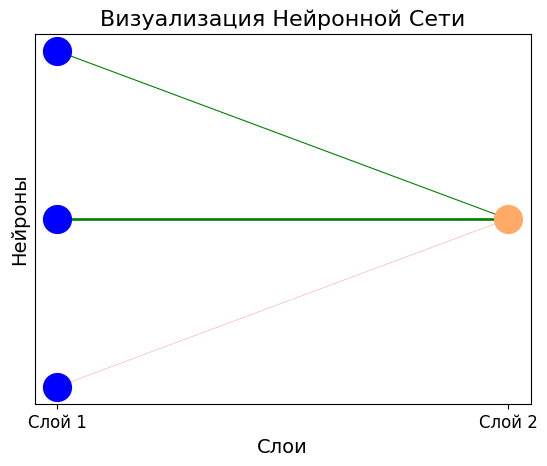

In [23]:
import numpy as np
import visualizer

visualizer.visualize([3, 1], [np.array([weights]).T])